In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import glob
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import load_model


C:\Users\kcrul\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
filelist = glob.glob('Resources/*.csv')
filelist

['Resources\\expedition_everest.csv',
 'Resources\\rock_n_rollercoaster.csv',
 'Resources\\soarin.csv',
 'Resources\\splash_mountain.csv']

In [4]:
foof = {}

for filename in filelist:
    foof[filename[10:-4]] = pd.read_csv(filename)

In [5]:
seasons = []
for season in list(foof["splash_mountain"]["SEASON"].values):
    if season not in seasons:
        seasons.append(season)
print(seasons)
print(len(seasons))

['CHRISTMAS PEAK', 'CHRISTMAS', 'WINTER', 'PRESIDENTS WEEK', 'SPRING', 'EASTER', 'MEMORIAL DAY', 'SUMMER BREAK', 'JULY 4TH', 'SEPTEMBER LOW', 'FALL', 'COLUMBUS DAY', 'HALLOWEEN', 'JERSEY WEEK', 'THANKSGIVING', 'MARTIN LUTHER KING JUNIOR DAY', 'MARDI GRAS']
17


In [6]:
partyseason = []
for season in list(foof["splash_mountain"]["PARTYSEASON_WDW"].values):
    if season not in partyseason:
        partyseason.append(season)
print(partyseason)
print(len(partyseason))

['NONE', 'MNSSHP', 'MVMCP']
3


In [7]:
len(foof["splash_mountain"].columns)

138

In [8]:
def convertTimetoInt(time):
    time = time.replace(':', '')
    return((int(time[0]) + float(time[1])/60))
for foo in foof: 
    foof[foo]["SACTMIN"] = foof[foo]["SACTMIN"].round(2)
    for i in foof[foo].columns[foof[foo].dtypes == object]:
        if ':' in foof[foo][i][0]:
            foof[foo][i] = foof[foo][i].map(convertTimetoInt)
        elif '%' in foof[foo][i][0]:
            foof[foo][i] = foof[foo][i].map(lambda x: x.strip('%'))
        #elif 'SEASON' in i:
            #temp[i] = to_categorical(pd.factorize(temp[i])[0])
         #   foof[foo][i] = pd.factorize(foof[foo][i])[0]
        #elif ' ' in foof[foo][i][0]:
         #   foof[foo][i] = pd.factorize(foof[foo][i])[0]

In [223]:
decision_tree_dat = dict()
for i in foof:
    decision_tree_dat[i] = foof[i].copy()

In [224]:
for foo in decision_tree_dat:
    for i in decision_tree_dat[foo].columns[decision_tree_dat[foo].dtypes == object]:
        if 'SEASON' in i:
              decision_tree_dat[foo][i] = pd.factorize(decision_tree_dat[foo][i])[0]
        elif ' ' in decision_tree_dat[foo][i][0]:
            decision_tree_dat[foo][i] = pd.factorize(decision_tree_dat[foo][i])[0]

In [225]:
for foo in decision_tree_dat:
    target = decision_tree_dat[foo]["SACTMIN"].values
    target = target.round()
    data = decision_tree_dat[foo].loc[:, decision_tree_dat[foo].columns != 'SACTMIN'].values
    
    rf = RandomForestClassifier(n_estimators=200)
    rf = rf.fit(data, target)
    print(foo)
    print(rf.score(data, target))

    importances = rf.feature_importances_


expedition_everest
1.0
rock_n_rollercoaster
1.0
soarin
1.0
splash_mountain
1.0


In [226]:
goof = {}

for foo in decision_tree_dat:
    print(foo)
    goof[foo] = pd.DataFrame(sorted(zip(rf.feature_importances_, list(foof[foo].columns)), reverse=True))

expedition_everest
rock_n_rollercoaster
soarin
splash_mountain


In [227]:
goof["expedition_everest"].head(60)

,0,1
0,0.029427,WDWrace
1,0.027897,WDWMAXTEMP
2,0.026518,WDWMINTEMP
3,0.024840,PARTYSEASON_WDW
4,0.022893,SEASON
5,0.022486,DAYOFWEEK
6,0.022364,WEATHER_WDWHIGH
7,0.019783,WDWMINTEMP_mean
8,0.016866,AKevent
9,0.015879,WEATHER_WDWLOW


In [228]:
goof["soarin"].head(60)

,0,1
0,0.029427,WDWrace
1,0.027897,WDWMAXTEMP
2,0.026518,WDWMINTEMP
3,0.024840,PARTYSEASON_WDW
4,0.022893,SEASON
5,0.022486,DAYOFWEEK
6,0.022364,WEATHER_WDWHIGH
7,0.019783,WDWMINTEMP_mean
8,0.016866,AKevent
9,0.015879,WEATHER_WDWLOW


In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [10]:
processing_data = {}

for foo in foof:
    print(foo)
    label_encoder = LabelEncoder()
    label_encoder.fit(foof[foo]["SEASON"])
    encoded = label_encoder.transform(foof[foo]["SEASON"])
    
    labels_SEASON = []
    originals_SEASON = []
    for label, original_class in zip(encoded, foof[foo]["SEASON"]):
        print('Original Class: ' + str(original_class))
        print('Encoded Label: ' + str(label))
        print('-' * 12)
        labels_SEASON.append(label)
        originals_SEASON.append(original_class)
        

        # Step 2: One-hot encoding
    one_hot = to_categorical(encoded)
    one_hot_pd = pd.DataFrame(one_hot)
        
    processing_data[foo] = foof[foo].loc[:, foof[foo].columns != 'SEASON']
    processing_data[foo]= processing_data[foo].join(one_hot_pd)

    

expedition_everest
Original Class: CHRISTMAS PEAK
Encoded Label: 1
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHE

Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CH

------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Origi

Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label:

------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Class: SEPTEMBER LOW
Encoded Label: 12
------------
Original Cla

Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encod

Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class:

------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
-

Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: COLUMBUS DAY
Encoded Label: 2
------------
Original Class: COLUMBUS DAY
Encoded Label: 2
------------
Original Class: COLUMBUS DAY
Encoded Label: 2
------------
Original Class: COLUMBUS DAY
Encoded Label: 2
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: FALL
Encoded Label: 4
------------

Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
----------

Original Class: THANKSGIVING
Encoded Label: 15
------------
Original Class: THANKSGIVING
Encoded Label: 15
------------
Original Class: THANKSGIVING
Encoded Label: 15
------------
Original Class: THANKSGIVING
Encoded Label: 15
------------
Original Class: THANKSGIVING
Encoded Label: 15
------------
Original Class: FALL
Encoded Label: 4
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
O

Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Lab

------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREA

Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------

Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: SUMMER BREAK
Encoded Lab

Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SPRING
Encoded Label: 13
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: JULY 4TH
Encoded Label: 7
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER

Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: MARTIN LUTHER KING JUNIOR DAY
Encoded Label: 9
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
---

Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDENTS WEEK
Encoded Label: 11
------------
Original Class: PRESIDEN

Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: WINTER
Encoded Label: 16
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Label: 0
------------
Original Class: CHRISTMAS
Encoded Lab

Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------
Original Class: SUMMER BREAK
Encoded Label: 14
------------


In [11]:
print(originals_SEASON)
print(labels_SEASON)

['CHRISTMAS PEAK', 'CHRISTMAS', 'CHRISTMAS', 'CHRISTMAS', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'PRESIDENTS WEEK', 'PRESIDENTS WEEK', 'PRESIDENTS WEEK', 'PRESIDENTS WEEK', 'PRESIDENTS WEEK', 'PRESIDENTS WEEK', 'PRESIDENTS WEEK', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'WINTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'EASTER', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING', 'SPRING',

In [12]:
label_convert = dict(zip(labels_SEASON, originals_SEASON))

for foo in processing_data:
    
    processing_data[foo].rename(columns=label_convert, inplace=True)


In [13]:
processing_data[foo]

,SACTMIN,DAYOFWEEK,DAYOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,WDWrace,...,JULY 4TH,MARDI GRAS,MARTIN LUTHER KING JUNIOR DAY,MEMORIAL DAY,PRESIDENTS WEEK,SEPTEMBER LOW,SPRING,SUMMER BREAK,THANKSGIVING,WINTER
0,11.50,5,0,1,2015,0,5,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,6,1,1,2015,2,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.33,7,2,1,2015,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.00,1,3,1,2015,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.40,1,31,2,2015,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.50,3,33,2,2015,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,5.00,4,34,2,2015,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.00,5,35,2,2015,5,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,14.00,6,36,2,2015,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,31.00,7,37,2,2015,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
for foo in processing_data:
    print(foo)
    label_encoder = LabelEncoder()
    label_encoder.fit(processing_data[foo]["PARTYSEASON_WDW"])
    encoded = label_encoder.transform(processing_data[foo]["PARTYSEASON_WDW"])
    
    labels_PARTY = []
    originals_PARTY = []
    for label, original_class in zip(encoded, processing_data[foo]["PARTYSEASON_WDW"]):
        print('Original Class: ' + str(original_class))
        print('Encoded Label: ' + str(label))
        print('-' * 12)
        labels_PARTY.append(label)
        originals_PARTY.append(original_class)
        

        # Step 2: One-hot encoding
    one_hot = to_categorical(encoded)
    one_hot_pd = pd.DataFrame(one_hot)
        
    processing_data[foo] = processing_data[foo].loc[:, processing_data[foo].columns != 'PARTYSEASON_WDW']
    processing_data[foo]= processing_data[foo].join(one_hot_pd)

expedition_everest
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Cla

Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded La

------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NO

Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded La

------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded La

Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded La

Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------------
Original Class: MNSSHP
Encoded Label: 0
------

Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded La

------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NO

------------
Original Class: NONE
Encoded Label: 2
------------
soarin
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Cl

------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NO

------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NO

Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
splash_mountain
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class:

------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NO

Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded Label: 2
------------
Original Class: NONE
Encoded La

In [15]:
label_convert = dict(zip(labels_PARTY, originals_PARTY))

for foo in processing_data:
    
    processing_data[foo].rename(columns=label_convert, inplace=True)

In [16]:
print(set(processing_data[foo][list(set(originals_PARTY))[2]]))
print(set(processing_data[foo][list(set(originals_PARTY))[1]]))


{0.0, 1.0}
{0.0, 1.0}


In [17]:
len(processing_data[foo].columns)

156

In [18]:
Week = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
Week_label = list(range(8))[1:]
week_convert = dict(zip(Week_label, Week))
print(week_convert)

{1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri', 7: 'Sat'}


In [19]:
for foo in processing_data:
    print(foo)
    processing_data[foo]["DAYOFWEEK"] = processing_data[foo]["DAYOFWEEK"].replace(week_convert)

expedition_everest
rock_n_rollercoaster
soarin
splash_mountain


In [20]:
processing_data[foo]

,SACTMIN,DAYOFWEEK,DAYOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,WDWrace,...,MEMORIAL DAY,PRESIDENTS WEEK,SEPTEMBER LOW,SPRING,SUMMER BREAK,THANKSGIVING,WINTER,MNSSHP,MVMCP,NONE
0,11.50,Thu,0,1,2015,0,5,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.00,Fri,1,1,2015,2,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37.33,Sat,2,1,2015,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,16.00,Sun,3,1,2015,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11.40,Sun,31,2,2015,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,2.50,Tue,33,2,2015,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,5.00,Wed,34,2,2015,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,3.00,Thu,35,2,2015,5,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,14.00,Fri,36,2,2015,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,31.00,Sat,37,2,2015,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
for foo in processing_data:
    print(foo)
    label_encoder = LabelEncoder()
    label_encoder.fit(processing_data[foo]["DAYOFWEEK"])
    encoded = label_encoder.transform(processing_data[foo]["DAYOFWEEK"])
    
    labels_WEEK = []
    originals_WEEK = []
    for label, original_class in zip(encoded, processing_data[foo]["DAYOFWEEK"]):
        print('Original Class: ' + str(original_class))
        print('Encoded Label: ' + str(label))
        print('-' * 12)
        labels_WEEK.append(label)
        originals_WEEK.append(original_class)
        

        # Step 2: One-hot encoding
    one_hot = to_categorical(encoded)
    one_hot_pd = pd.DataFrame(one_hot)
        
    processing_data[foo] = processing_data[foo].loc[:, processing_data[foo].columns != "DAYOFWEEK"]
    processing_data[foo]= processing_data[foo].join(one_hot_pd)

expedition_everest
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Lab

------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Fri
Encoded Label: 0


Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------


------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0


Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------


------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5


Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon


------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5


Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------


------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0


------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3


Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------


Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------


Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------


Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------


Encoded Label: 3
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Fri
Encoded Label: 0
------------
Original Class: Sat
Encoded Label: 2
------------
Original Class: Sun
Encoded Label: 3
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue
Encoded Label: 5
------------
Original Class: Wed
Encoded Label: 6
------------
Original Class: Thu
Encoded Label: 4
------------
Original Class: Mon
Encoded Label: 1
------------
Original Class: Tue


In [22]:
print(originals_WEEK)
print(labels_WEEK)


['Thu', 'Fri', 'Sat', 'Sun', 'Sun', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Wed', 'Thu', 'Fri', 'Mon', 'Wed', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Sat', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Fri', 'Sat', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Fri', 'Sat', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Wed', 'Thu', 'Fri', 'Mon', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'

In [23]:
label_convert = dict(zip(labels_WEEK, originals_WEEK))

for foo in processing_data:
    
    processing_data[foo].rename(columns=label_convert, inplace=True)

In [24]:
processing_data[foo]["Sun"]

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     1.0
27     0.0
28     0.0
29     0.0
      ... 
941    0.0
942    0.0
943    1.0
944    0.0
945    0.0
946    0.0
947    0.0
948    0.0
949    1.0
950    0.0
951    0.0
952    0.0
953    0.0
954    0.0
955    1.0
956    0.0
957    0.0
958    0.0
959    0.0
960    0.0
961    1.0
962    0.0
963    0.0
964    0.0
965    0.0
966    0.0
967    0.0
968    0.0
969    0.0
970    0.0
Name: Sun, Length: 971, dtype: float32

In [25]:
originals_SEASON = list(set(originals_SEASON))
print(originals_SEASON)

originals_PARTY = list(set(originals_PARTY))
print(originals_PARTY)

originals_WEEK = list(set(originals_WEEK))
print(originals_WEEK)


['PRESIDENTS WEEK', 'MARTIN LUTHER KING JUNIOR DAY', 'SUMMER BREAK', 'CHRISTMAS', 'MARDI GRAS', 'COLUMBUS DAY', 'JERSEY WEEK', 'EASTER', 'HALLOWEEN', 'THANKSGIVING', 'SEPTEMBER LOW', 'JULY 4TH', 'WINTER', 'SPRING', 'MEMORIAL DAY', 'CHRISTMAS PEAK', 'FALL']
['MVMCP', 'MNSSHP', 'NONE']
['Sun', 'Wed', 'Mon', 'Sat', 'Tue', 'Thu', 'Fri']


In [26]:
columns = ['SACTMIN','WDWMAXTEMP', 'inSession', 'SEASON', "WDWrace"]
columns = columns + originals_SEASON + originals_PARTY + originals_WEEK
columns.remove("SEASON")
columns.remove("NONE")
print(columns)
print(len(columns))

['SACTMIN', 'WDWMAXTEMP', 'inSession', 'WDWrace', 'PRESIDENTS WEEK', 'MARTIN LUTHER KING JUNIOR DAY', 'SUMMER BREAK', 'CHRISTMAS', 'MARDI GRAS', 'COLUMBUS DAY', 'JERSEY WEEK', 'EASTER', 'HALLOWEEN', 'THANKSGIVING', 'SEPTEMBER LOW', 'JULY 4TH', 'WINTER', 'SPRING', 'MEMORIAL DAY', 'CHRISTMAS PEAK', 'FALL', 'MVMCP', 'MNSSHP', 'Sun', 'Wed', 'Mon', 'Sat', 'Tue', 'Thu', 'Fri']
30


In [27]:
modeling_data = {}
for foo in processing_data:
    modeling_data[foo] = processing_data[foo][columns]
    

In [28]:
modeling_data

{'expedition_everest':       SACTMIN  WDWMAXTEMP inSession  WDWrace  PRESIDENTS WEEK  \
 0       10.50       73.02         0        0              0.0   
 1        5.50       78.00         0        0              0.0   
 2       24.33       83.12         0        0              0.0   
 3       25.00       83.93        67        0              0.0   
 4        3.00       72.30        67        0              0.0   
 5       10.33       77.67        86        0              0.0   
 6        9.00       67.24        88        1              0.0   
 7       35.00       59.44        88        1              0.0   
 8        7.67       54.89        88        1              0.0   
 9       27.50       67.16        88        1              0.0   
 10       9.50       77.10        94        1              0.0   
 11       0.00       78.24        94        0              0.0   
 12       3.00       74.89        94        0              0.0   
 13      11.50       62.12        92        0         

In [167]:
temp = modeling_data["rock_n_rollercoaster"]
temp

,SACTMIN,WDWMAXTEMP,inSession,WDWrace,PRESIDENTS WEEK,MARTIN LUTHER KING JUNIOR DAY,SUMMER BREAK,CHRISTMAS,MARDI GRAS,COLUMBUS DAY,...,FALL,MVMCP,MNSSHP,Sun,Wed,Mon,Sat,Tue,Thu,Fri
0,41.20,73.02,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26.00,78.00,0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30.00,83.12,0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21.00,72.30,67,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11.00,77.67,86,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,36.00,67.24,88,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,29.67,59.44,88,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,42.00,54.89,88,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,40.33,67.16,88,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,11.40,77.10,94,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
target = temp["SACTMIN"].values
data = temp.loc[:, temp.columns != 'SACTMIN'].values.tolist()

In [169]:
X = data
X = np.asarray(X)

In [170]:
X

array([['73.02', '0', '0', ..., '0.0', '1.0', '0.0'],
       ['78.0', '0', '0', ..., '0.0', '0.0', '1.0'],
       ['83.12', '0', '0', ..., '0.0', '0.0', '0.0'],
       ...,
       ['90.21', '16', '0', ..., '0.0', '0.0', '1.0'],
       ['91.31', '16', '0', ..., '0.0', '0.0', '0.0'],
       ['90.08', '21', '0', ..., '0.0', '0.0', '0.0']], dtype='<U32')

In [171]:
y = target
y = np.asarray(y)
y = y.reshape(-1,1)


In [172]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

C:\Users\kcrul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [173]:
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)


C:\Users\kcrul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=28, test_size=0.3)

In [175]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [176]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.12043594328286833
Testing Score: 0.052445211223485104


In [177]:
target = temp["SACTMIN"].values.tolist()

data = temp.loc[:, temp.columns != 'SACTMIN']

X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.12101785640952656
Testing Score: 0.050474838837242575


Text(0.5,1,'Residual Plot')

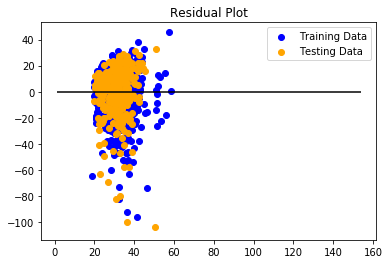

In [178]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=min(y), xmax=max(y))
plt.title("Residual Plot")
### END SOLUTION

In [179]:
X_train.columns

Index(['WDWMAXTEMP', 'inSession', 'WDWrace', 'PRESIDENTS WEEK',
       'MARTIN LUTHER KING JUNIOR DAY', 'SUMMER BREAK', 'CHRISTMAS',
       'MARDI GRAS', 'COLUMBUS DAY', 'JERSEY WEEK', 'EASTER', 'HALLOWEEN',
       'THANKSGIVING', 'SEPTEMBER LOW', 'JULY 4TH', 'WINTER', 'SPRING',
       'MEMORIAL DAY', 'CHRISTMAS PEAK', 'FALL', 'MVMCP', 'MNSSHP', 'Sun',
       'Wed', 'Mon', 'Sat', 'Tue', 'Thu', 'Fri'],
      dtype='object')

In [212]:
testing = [100, 80, 0, 0, 0,
                  1, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0,  0, 0, 0,
                  1, 0, 0, 0, 0, 0, 0]

In [213]:

testing = np.asarray([testing])
print(testing)


[[100  80   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0   0   0   0]]


In [218]:
model.predict(testing)

array([22.15996814])

In [219]:
expedition_everest = model.predict(testing)
splash_mountain = model.predict(testing)
soarin = model.predict(testing)
rock_n_rollercoaster = model.predict(testing)

In [183]:
temp.to_csv("expedition_everest_fin_dat.csv", index = False)

In [184]:
from sklearn.externals import joblib
joblib.dump(model, 'rock_n_rollercoaster.pkl')

['rock_n_rollercoaster.pkl']

In [220]:
prediction = [expedition_everest[0], splash_mountain[0], soarin[0], rock_n_rollercoaster[0]]

In [221]:
prediction = [int(predict.round()) for predict in prediction]

In [222]:
prediction

[22, 22, 22, 22]

In [199]:
prediction[0]f

34